In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Анализ таблицы на конкретную дату

Укажем путь к файлам (пока вручную) и дату, за которую проводим анализ

In [2]:
date = '10.12.2019'
path = 'Output\\' + date + '\\'

In [3]:
# Ниже приведен код правильной подгрузки файлов с сохранением мультииндекса
alldoc = pd.read_csv(path + date + '_Все_документы' + '.csv', header=[0, 1], index_col=0, encoding='cp1251') # Таблица с общим количеством документов
allper = pd.read_csv(path + date + '_Все_документы_%' + '.csv', header=[0, 1], index_col=0, encoding='cp1251') # Таблица с общим количеством документов в процентах
podr = pd.read_csv(path + date + '_Все_документы_подр' + '.csv', header=[0, 1], index_col=0, encoding='cp1251')# Таблица с документами по подразделениям (общее) #######
podrproc = pd.read_csv(path + date + '_Все_документы_подр_общ_%' + '.csv', header=[0, 1], index_col=0, encoding='cp1251')# Таблица с документами по подразделениям в процентах (от общего количества по всему проекту)
podrpr = pd.read_csv(path + date + '_Все_документы_подр_%' + '.csv', header=[0, 1], index_col=0, encoding='cp1251')# Готовность документов в процентах (по подразделениям) ######
isp = pd.read_csv(path + date + '_Все_документы_исп' + '.csv', header=[0, 1], index_col=[0, 1], encoding='cp1251')# Состояние готовности документации по исполнителям !!!!!!!!!!!!!!!!!!!!!!!!!!!

## 1.1 Подготовим внешний вид диаграммы для вывода

In [4]:
# Посчитаем общее количество документов
alldocsum = alldoc[alldoc.columns[0]][0] + alldoc[alldoc.columns[1]][0]
alldocsum

4329

In [5]:
# Зададим размер шрифта на осях
matplotlib.rc('font', size=12)

In [6]:
# Указанная ниже функция выводит график в виде баров
def bar_func(data, ylabel, title, name=False):
    """
    data - набор данных
    title - заголовок графика
    ylabel - название по оси Y
    name - имя для файла
    """
    
    docd = list(data[data.columns[0]]) # значение сделаных документов
    doctn = list(data[data.columns[1]]) # значение не сделаных документов

    x = np.arange(len(docd))
    width = 0.35 # ширина баров

    fig, ax = plt.subplots(figsize=(10, 10))

    done = ax.bar(x-width/2, docd, width, label=data.columns[0][1], color='g', alpha=0.7)
    notd = ax.bar(x+width/2, doctn, width, label=data.columns[1][1], color='r', alpha=0.7)

    ax.set_ylabel(ylabel, fontsize=16, labelpad = 15) # задать название по оси Y  и размер шрифта
    ax.set_title(title, pad=25, fontsize=22) # задать заголовок , отступ от графика и размер шрифта
    ax.set_xticks(x) # задать метки по оси X
    ax.set_xticklabels(data.columns[0], fontsize=16) # задать названия меток по оси X и размер шрифка
    ax.legend(fontsize=14)  # добавить легенду
    # ax.axis('off') # убрать рамку графика
    ax.set_ylim(ymax = max(data[data.columns[0]] + data[data.columns[1]])) # установим максимум по оси x - сумма всех документов
    ax.set_xlim(xmin = -0.6, xmax = 0.6) # установим предельные значения по оси x
    # Прикрепим к каждому столбику метку с количеством документов
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=22)
    autolabel(done)
    autolabel(notd)
    fig.tight_layout()
    if name:
        pathfig = path + 'PNG\\'
        if not os.path.exists(pathfig):
            os.makedirs(pathfig)
        plt.savefig(pathfig + name);
    plt.show()
   

## 1.2 Все документы

In [7]:
alldoc

10.12.2019                     
          Документов готово Документов не готово
Всего, шт              3307                 1022

c:\users\rusancovs\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')
c:\users\rusancovs\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
c:\users\rusancovs\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')


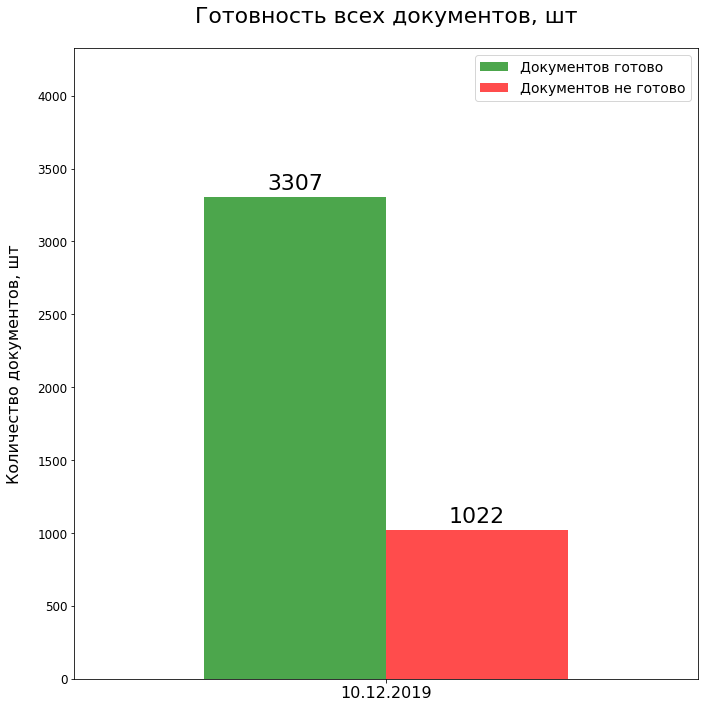

In [8]:
kwarg = dict(data=alldoc, ylabel='Количество документов, шт', title='Готовность всех документов, шт', name='1.Все_документы.png') # словарь с аргументами для bar_func
bar_func(**kwarg)

## 1.3 Все документы %

In [9]:
allper

10.12.2019                     
         Документов готово Документов не готово
Всего, %              76.0                 24.0

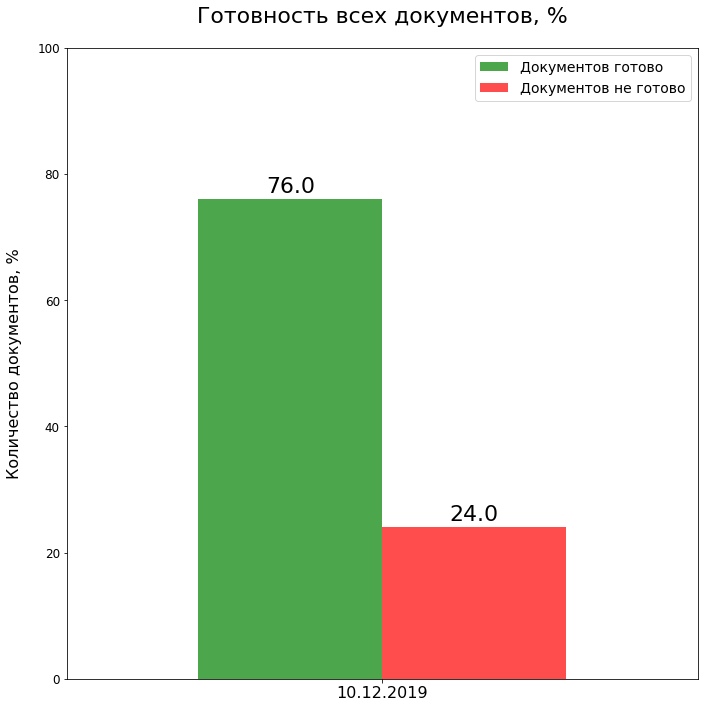

In [10]:
kwarg = dict(data=allper, ylabel='Количество документов, %', title='Готовность всех документов, %', name='2.Все_документы_%.png')
bar_func(**kwarg)

## 1.4 Готовность документов по подразделениям

__Для отображения нескольких групп баров преобразуем функцию вывода графика__

In [11]:
# Указанная ниже функция выводит график в виде баров для нескольких групп
def bar_mult_func(data, ylabel, title, name=False):
    """
    data - набор данных
    title - заголовок графика
    ylabel - название по оси Y
    name - имя для файла
    """
    docd = list(data[data.columns[0]]) # значение сделаных документов
    doctn = list(data[data.columns[1]]) # значение не сделаных документов

    x = np.arange(len(docd))
    width = 0.35 # ширина баров

    fig, ax = plt.subplots(figsize=(10, 10))

    done = ax.bar(x-width/2, docd, width, label=data.columns[0][1], color='g', alpha=0.7)
    notd = ax.bar(x+width/2, doctn, width, label=data.columns[1][1], color='r', alpha=0.7)

    ax.set_ylabel(ylabel, fontsize=16, labelpad = 15) # задать название по оси Y  и размер шрифта
    ax.set_title(title, pad=40, fontsize=18) # задать заголовок , отступ от графика и размер шрифта
    ax.set_xticks(x) # задать метки по оси X
    ax.set_xticklabels([i for i in data.index], fontsize=16) # задать названия меток по оси X и размер шрифка
    ax.legend(fontsize=14)  # добавить легенду
    # ax.axis('off') # убрать рамку графика
    ax.set_ylim(ymax = max(data[data.columns[0]] + data[data.columns[1]]) + 19) # установим максимум по оси x - сумма всех документов
    # ax.set_xlim(xmin = -0.6, xmax = 0.6) # установим предельные значения по оси x
    # Прикрепим к каждому столбику метку с количеством документов
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=18)
    autolabel(done)
    autolabel(notd)
    fig.tight_layout()
    if name:
        pathfig = path + 'PNG\\'
        if not os.path.exists(pathfig):
            os.makedirs(pathfig)
        plt.savefig(pathfig + name);
    plt.show();

In [12]:
podr

10.12.2019                     
                 Документов готово Документов не готово
Подразделение                                          
НТЦ ИКС НК                     261                  620
ПКО                           2149                  217
РИМАП                          865                  185
Серийное изделие                32                    0

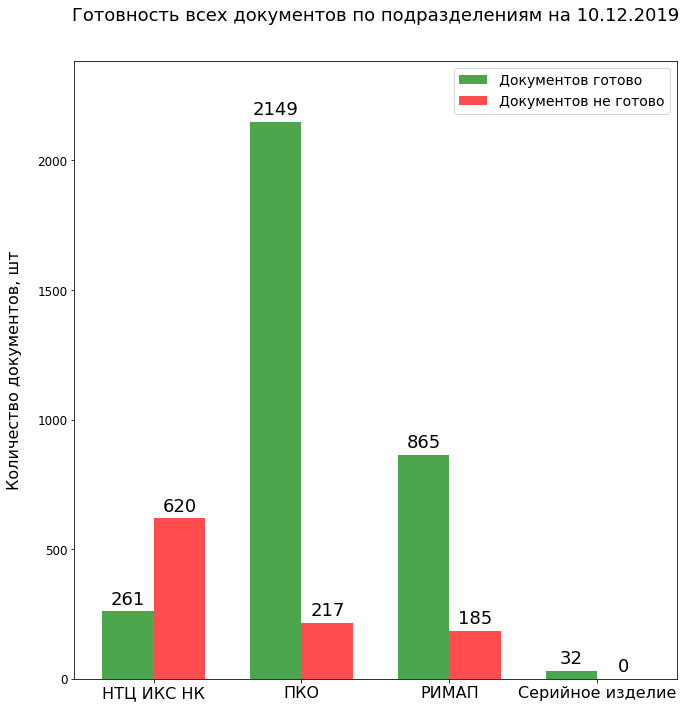

In [13]:
kwarg = dict(data=podr, ylabel='Количество документов, шт', 
             title='Готовность всех документов по подразделениям на ' + podr.columns[0][0], 
             name = '3.Все_документы_подр.png')
bar_mult_func(**kwarg)

In [14]:
podrproc

10.12.2019                       \
                 Документов готово Документов не готово   
Подразделение                                             
НТЦ ИКС НК                     6.0                 14.0   
ПКО                           50.0                  5.0   
РИМАП                         20.0                  4.0   
Серийное изделие               1.0                  0.0   

                                             
                 Всего от общего количества  
Подразделение                                
НТЦ ИКС НК                             20.0  
ПКО                                    55.0  
РИМАП                                  24.0  
Серийное изделие                        1.0

## 1.6 Готовность по подразделениям в процентах

In [15]:
podrpr

10.12.2019                     
                 Документов готово Документов не готово
Подразделение                                          
НТЦ ИКС НК                    30.0                 70.0
ПКО                           91.0                  9.0
РИМАП                         82.0                 18.0
Серийное изделие             100.0                  0.0

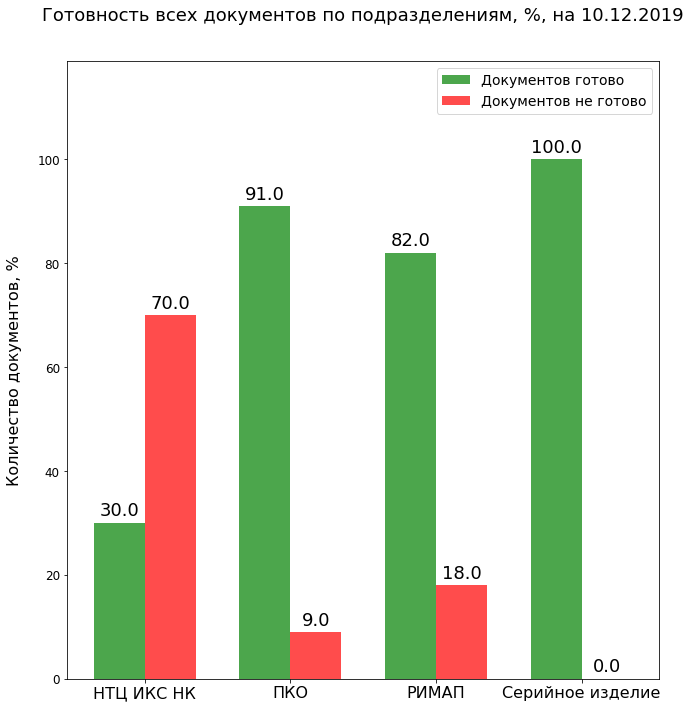

In [16]:
kwarg = dict(data=podrpr, ylabel='Количество документов, %', 
             title='Готовность всех документов по подразделениям, %, на ' + podr.columns[0][0], 
             name='4.Все_документы_подр%.png')
bar_mult_func(**kwarg)